In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.__version__

'0.11.2'

In [39]:
df = pd.read_csv(r"C:\Users\shossein\Desktop\LCGABA_ML/Overal_Intrinsic.csv",
                 header=None,
#                  dtype={'leak_current (pA)':np.float64,
#                         'Rheobase_long (pA)':np.float64},
                 float_precision='round_trip',
                )
df = df.set_index(df.columns[0])
df = df.transpose()


In [40]:
df_feutures = df.iloc[:, :-1].astype('float64')
df_labels = df.iloc[:, -1:]
df_feutures['line'] =  df_labels
df = df_feutures

In [41]:
df.head()

,leak_current (pA),Rheobase_long (pA),reset_threshold (mv),F_I_Slope Hz/pA),Mean F_I_Slope Hz/pA),tau (ms),membrane_resistance (Mohm)),Capacitance (pF),sag_amplitude_IV (mV),AP_width (ms),AHP (mV),AHP_slow (mV),AP_fall (ms),AP_rise (ms),ISI_CVV,adaptation_indexx,FWHM (ms),resting_potential (mV),AP_peak (mV),line
1,-46.598537,25.810370,-38.146973,4.812028,5.122032,17.417707,250.100447,47.257614,9.663899,1.6,-9.538130,-8.150390,1.3,0.8,0.033051,-0.002254,0.9,-58.531192,43.933105,Sst-Cre
2,-46.793364,75.929310,-32.897949,0.925960,4.229709,20.338141,248.957635,38.152870,6.225586,1.4,-4.090858,3.236019,1.4,0.6,0.029797,-0.036851,1.0,-64.739662,46.352386,Sst-Cre
3,-23.553091,25.169017,-40.435791,5.555395,5.206577,17.753640,281.670788,65.713979,3.468831,2.2,-9.885037,-9.746667,1.3,0.7,0.033339,-0.015741,0.9,-62.297049,46.624756,Sst-Cre
4,-27.575724,50.134683,-34.240723,1.969871,4.166680,19.874557,266.694017,85.206199,4.221598,2.2,-12.377305,-6.386266,1.3,0.5,0.067431,-0.042448,0.8,-58.451281,46.095106,Sst-Cre
5,-46.131061,50.925778,-42.205811,4.537329,8.276392,16.857185,206.654032,47.524435,11.413574,1.5,15.635635,18.595840,1.3,0.6,0.002571,-0.043489,0.9,-80.126695,34.461127,Sst-Cre


## Exploratory Data Analysis and Visualization
Feel free to explore the data further on your own.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1 to 147
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   leak_current (pA)            147 non-null    float64
 1   Rheobase_long (pA)           147 non-null    float64
 2   reset_threshold (mv)         147 non-null    float64
 3   F_I_Slope Hz/pA)             147 non-null    float64
 4   Mean F_I_Slope Hz/pA)        147 non-null    float64
 5   tau (ms)                     147 non-null    float64
 6   membrane_resistance (Mohm))  147 non-null    float64
 7   Capacitance (pF)             147 non-null    float64
 8   sag_amplitude_IV (mV)        147 non-null    float64
 9   AP_width (ms)                147 non-null    float64
 10  AHP (mV)                     147 non-null    float64
 11  AHP_slow (mV)                147 non-null    float64
 12  AP_fall (ms)                 147 non-null    float64
 13  AP_rise (ms)        

In [43]:
df.describe()

,leak_current (pA),Rheobase_long (pA),reset_threshold (mv),F_I_Slope Hz/pA),Mean F_I_Slope Hz/pA),tau (ms),membrane_resistance (Mohm)),Capacitance (pF),sag_amplitude_IV (mV),AP_width (ms),AHP (mV),AHP_slow (mV),AP_fall (ms),AP_rise (ms),ISI_CVV,adaptation_indexx,FWHM (ms),resting_potential (mV),AP_peak (mV)
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,-30.977273,70.898620,-34.674795,3.359477,3.508677,17.362503,314.372780,60.624400,1.449890,2.096226,2.911136,5.872780,1.412891,1.035502,0.120150,0.032601,1.370331,-57.693426,37.188040
std,29.463900,67.961423,5.379228,3.661348,3.926685,6.673915,140.695257,28.197708,9.309145,1.176901,8.788891,10.032544,0.661889,0.560108,0.175017,0.083372,0.921154,10.945287,20.001853
min,-95.671080,0.000000,-49.255371,0.015503,0.208333,5.567491,64.078431,19.062853,-22.206625,0.276000,-12.377305,-15.414960,0.001000,0.049000,0.000000,-0.231071,0.000000,-89.796293,17.444611
25%,-55.578485,25.158501,-37.841797,0.548032,0.566859,12.860448,234.176164,38.396191,-2.980550,1.200000,-4.182323,0.000000,1.200000,0.700000,0.000000,0.000000,0.800000,-64.844964,25.186026
50%,-26.021356,50.315782,-34.729004,2.283364,2.400398,17.331361,279.702413,56.178802,1.749674,1.900000,1.945264,0.003121,1.500000,0.900000,0.061027,0.000000,1.100000,-58.451281,28.403748
75%,-2.890292,101.008794,-31.585693,4.515930,5.146023,21.198517,380.443609,75.170142,8.231771,2.850000,9.699677,14.442848,1.900000,1.200000,0.156474,0.050566,1.800000,-49.288468,36.772810
max,3.941091,406.777286,-19.256592,18.333333,30.098097,38.207228,834.981304,161.021048,22.715250,6.000000,27.169083,37.875751,2.500000,3.500000,1.050489,0.450148,4.500000,-29.212866,87.490000


In [44]:
# df.drop('Line', axis=1).astype(float).describe()

In [45]:
df['line'].value_counts()

dlx-Cre    50
Sst-Cre    39
PV-Cre     32
LC         26
Name: line, dtype: int64

C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


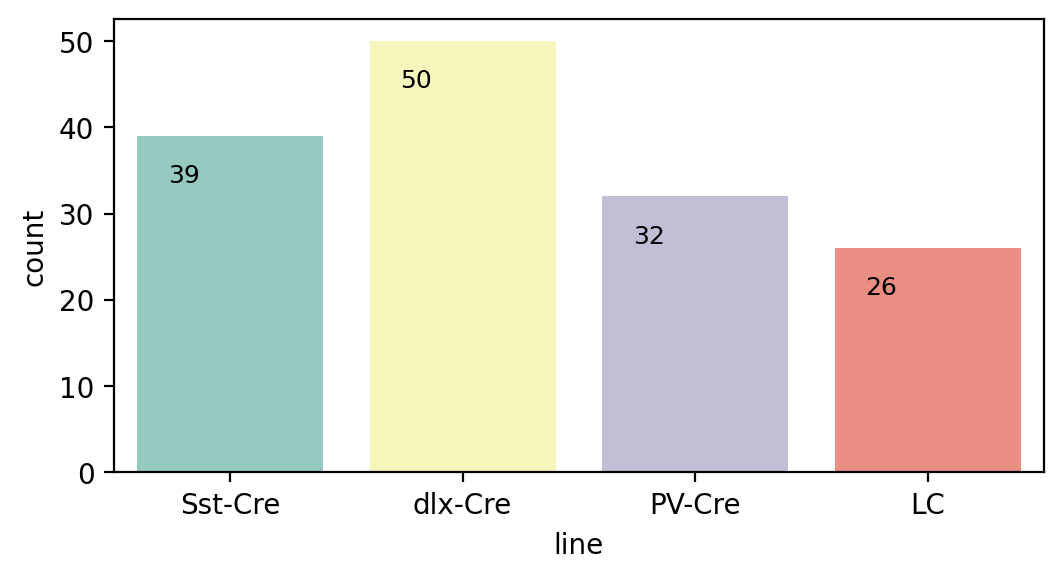

In [143]:
plt.figure(figsize=(6, 3), dpi=200)
ax = sns.countplot(df['line'], palette = "Set3");
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=9)

In [47]:
dff = df.sort_values(by=['AP_width (ms)'])
dff = df.sort_values(by=['AP_peak (mV)'])

<Figure size 1200x800 with 0 Axes>

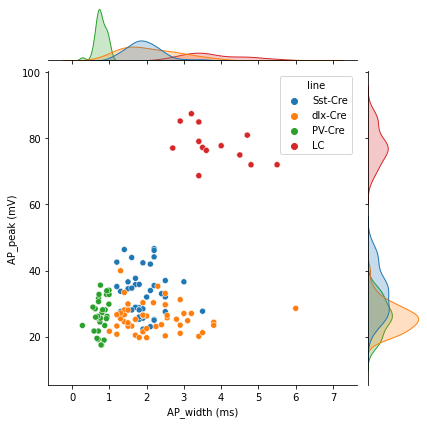

In [48]:
plt.figure(figsize=(6, 4), dpi=200)
sns.jointplot(x='AP_width (ms)', y='AP_peak (mV)', data= df, 
              hue='line', 
#               kind= "hex"
     );
plt.xticks(rotation=90);

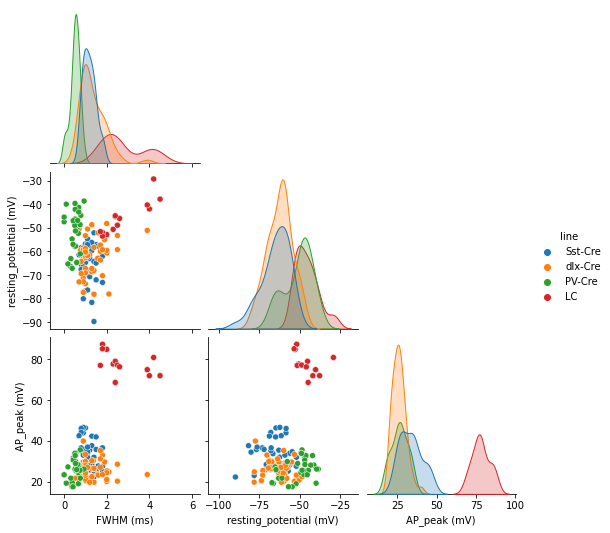

In [49]:
sns.pairplot(df.iloc[:, -4:], hue='line', corner= True);

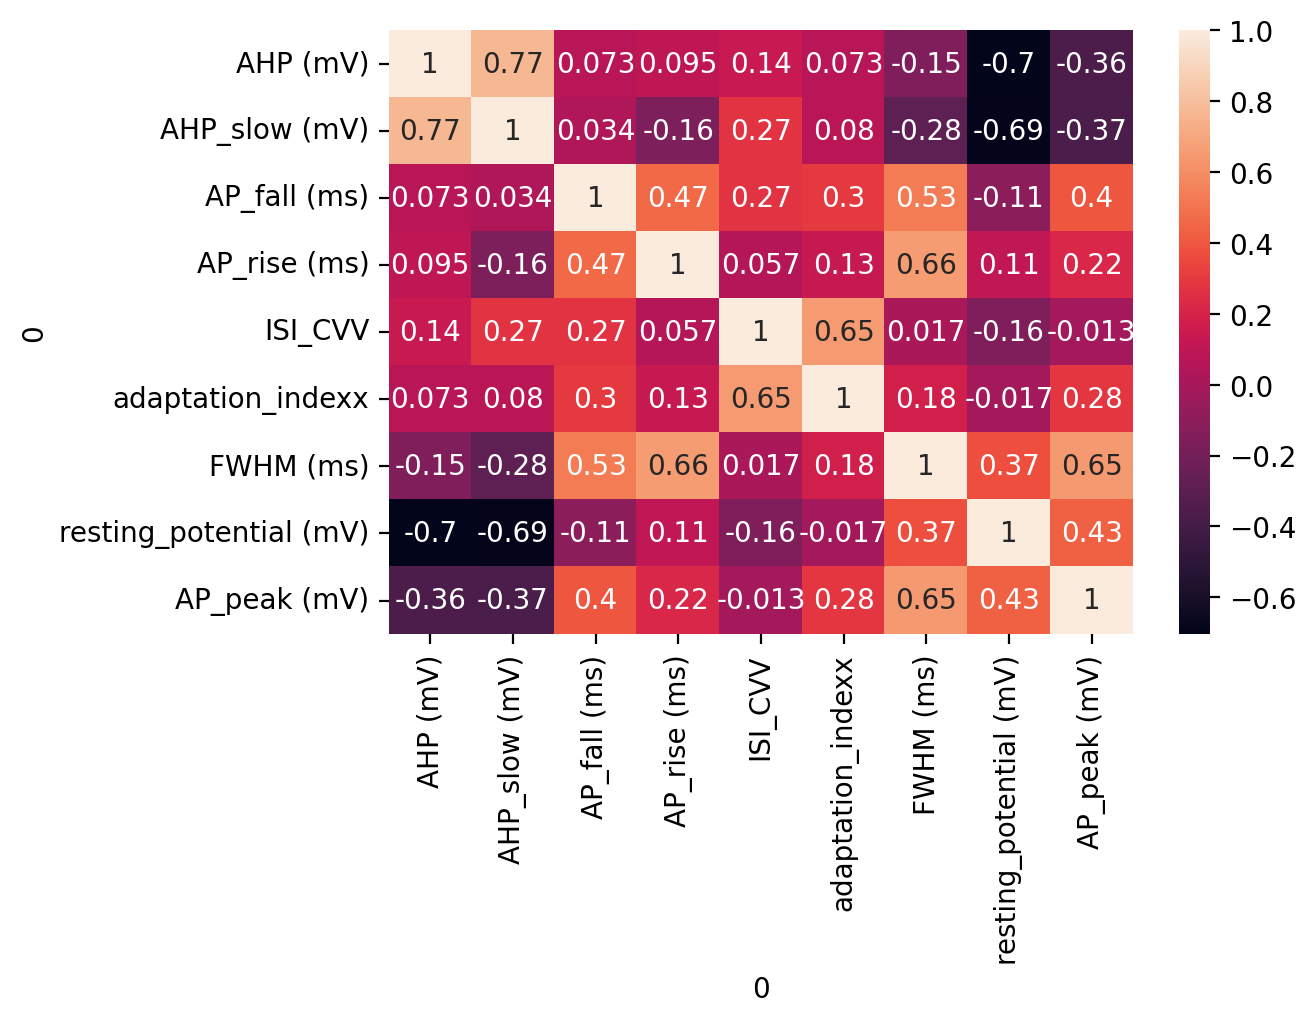

In [50]:
plt.figure(figsize=(6, 4), dpi=200)
sns.heatmap(df.iloc[:, -10:].corr(), annot=True)

In [102]:
X = df.drop('line', axis=1)
y = df['line']


In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [105]:
scaler = StandardScaler()

In [106]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Multi-Class Logistic Regression Model

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [108]:
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver = 'saga', multi_class= 'ovr', max_iter=5000)

### GridSearch for Best Hyper-Parameters
Main parameter choices are regularization penalty choice and regularization C value.

In [109]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [110]:
grid_model = GridSearchCV(log_model, param_grid={'C':C,'penalty':penalty})

In [111]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [112]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [113]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', solver='saga')

Feature: 0, Score: 0.24771
Feature: 1, Score: -0.31083
Feature: 2, Score: 0.03281
Feature: 3, Score: -0.19512
Feature: 4, Score: -0.15259
Feature: 5, Score: 0.55173
Feature: 6, Score: -0.00416
Feature: 7, Score: 0.68291
Feature: 8, Score: -0.49489
Feature: 9, Score: 0.59705
Feature: 10, Score: -0.15623
Feature: 11, Score: -0.24862
Feature: 12, Score: 0.39821
Feature: 13, Score: 0.03679
Feature: 14, Score: -0.01230
Feature: 15, Score: 0.39763
Feature: 16, Score: 0.47811
Feature: 17, Score: 0.44352
Feature: 18, Score: 1.26218


C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'leak_current (pA)'),
 Text(0, 0, 'Rheobase_long (pA)'),
 Text(0, 0, 'reset_threshold (mv)'),
 Text(0, 0, 'F_I_Slope Hz/pA)'),
 Text(0, 0, 'Mean F_I_Slope Hz/pA)'),
 Text(0, 0, 'tau (ms)'),
 Text(0, 0, 'membrane_resistance (Mohm))'),
 Text(0, 0, 'Capacitance (pF)'),
 Text(0, 0, 'sag_amplitude_IV (mV)'),
 Text(0, 0, 'AP_width (ms)'),
 Text(0, 0, 'AHP (mV)'),
 Text(0, 0, 'AHP_slow (mV)'),
 Text(0, 0, 'AP_fall (ms)'),
 Text(0, 0, 'AP_rise (ms)'),
 Text(0, 0, 'ISI_CVV'),
 Text(0, 0, 'adaptation_indexx'),
 Text(0, 0, 'FWHM (ms)'),
 Text(0, 0, 'resting_potential (mV)'),
 Text(0, 0, 'AP_peak (mV)')]

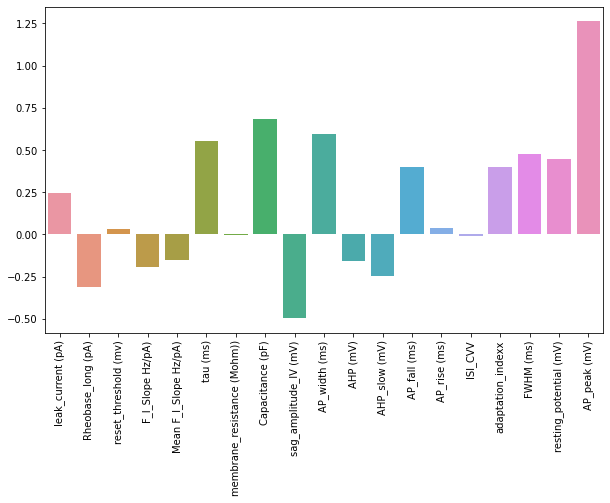

In [114]:
importance = log_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig, ax = plt.subplots(figsize = (10,6))
g = sns.barplot([x for x in range(len(importance))], importance)
g.set(xticklabels=df.columns)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


In [115]:
df.drop('line', axis = 1).columns.unique()


Index(['leak_current (pA)', 'Rheobase_long (pA)', 'reset_threshold (mv)',
       'F_I_Slope Hz/pA)', 'Mean F_I_Slope Hz/pA)', 'tau (ms)',
       'membrane_resistance (Mohm))', 'Capacitance (pF)',
       'sag_amplitude_IV (mV)', 'AP_width (ms)', 'AHP (mV)', 'AHP_slow (mV)',
       'AP_fall (ms)', 'AP_rise (ms)', 'ISI_CVV', 'adaptation_indexx',
       'FWHM (ms)', 'resting_potential (mV)', 'AP_peak (mV)'],
      dtype='object', name=0)

In [116]:
# df.Item.unique()

## Model Performance on Classification Tasks

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, plot_confusion_matrix

In [118]:
y_pred = grid_model.predict(scaled_X_test)

In [119]:
accuracy_score(y_test,y_pred)

0.7555555555555555

In [120]:
confusion_matrix(y_test, y_pred)

array([[ 7,  0,  0,  0],
       [ 0,  9,  2,  1],
       [ 0,  0,  5,  4],
       [ 0,  0,  4, 13]], dtype=int64)

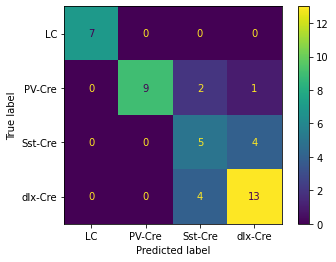

In [121]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

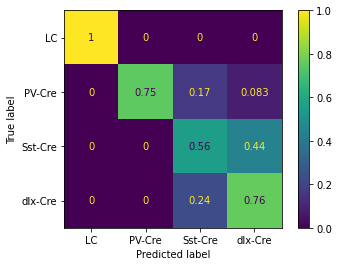

In [122]:
# Scaled so highest value=1
plot_confusion_matrix(grid_model,scaled_X_test,y_test,normalize='true')

In [73]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          LC       1.00      1.00      1.00         7
      PV-Cre       1.00      0.75      0.86        12
     Sst-Cre       0.45      0.56      0.50         9
     dlx-Cre       0.72      0.76      0.74        17

    accuracy                           0.76        45
   macro avg       0.79      0.77      0.78        45
weighted avg       0.79      0.76      0.76        45



### Evaluating Curves and AUC
Make sure to watch the video on this! We need to manually create the plots for a Multi-Class situation. Fortunately, Scikit-learn's documentation already has plenty of examples on this.
Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
We have created a function for you that does this automatically, essentially creating and plotting an ROC per class.

In [74]:
from sklearn.metrics import roc_curve, auc

In [75]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

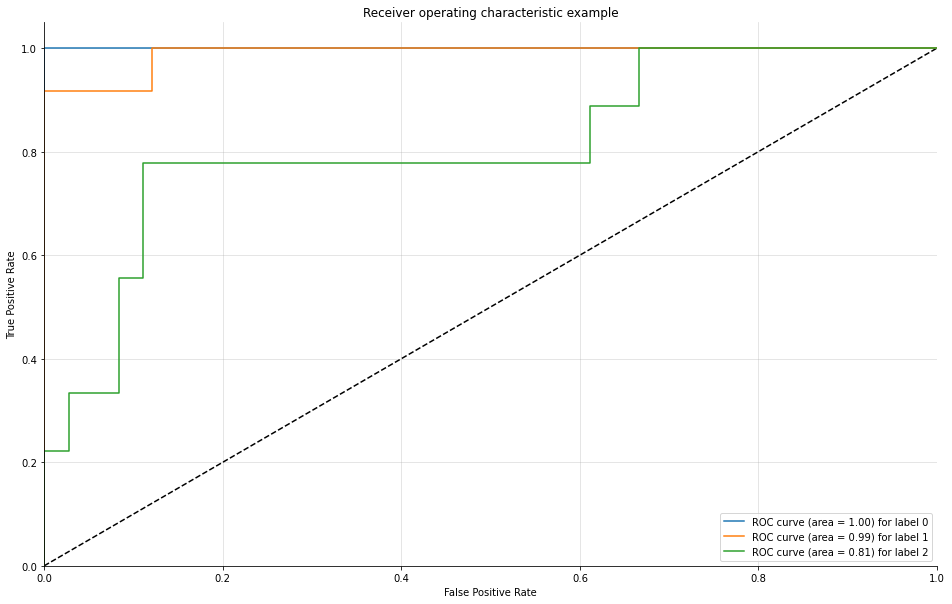

In [76]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))

## Predicting the patched TransSynaptic from PFC

In [97]:
df_new = pd.read_csv(r"C:\Users\shossein\Desktop\LCGABA_ML/Overal_Intrinsic_TransSynapse_PFC_LC.csv",
                 header=None,
#                  dtype={'leak_current (pA)':np.float64,
#                         'Rheobase_long (pA)':np.float64},
                 float_precision='round_trip',
                )
df_new = df_new.set_index(df_new.columns[0])
df_new = df_new.transpose()

In [99]:
df_new.head()

,leak_current (pA),Rheobase_long (pA),reset_threshold (mv),F_I_Slope Hz/pA),Mean F_I_Slope Hz/pA),tau (ms),membrane_resistance (Mohm)),Capacitance (pF),sag_amplitude_IV (mV),AP_width (ms),AHP (mV),AHP_slow (mV),AP_fall (ms),AP_rise (ms),ISI_CVV,adaptation_indexx,FWHM (ms),resting_potential (mV),AP_peak (mV)
1,-9.999695,25.0,-41.290283,4.614996,5.226025,17.982838,283.334302,63.468623,-2.685547,2.1,17.827467,27.074294,1.5,0.8,1.319481,0.048045,1.2,-69.685799,15.000000
2,-9.999695,25.0,-37.353516,4.277804,5.534895,22.335723,311.269160,71.756943,-0.427246,1.9,13.434670,19.477151,1.6,0.7,0.451085,0.352465,1.2,-64.698093,18.548584
3,-9.999695,0.0,-36.224365,3.069994,4.268292,40.893644,569.147698,71.850672,-3.845215,2.7,-3.416004,2.615033,0.1,1.2,0.065686,0.021299,1.7,-71.323571,18.266466
4,-9.999695,25.0,-40.588379,11.666044,2.463006,23.014215,568.869020,40.456087,-10.915120,2.8,-11.938731,-9.192149,0.1,1.3,0.101880,0.007372,1.6,-41.956405,11.901855
5,-9.999695,25.0,-36.346436,2.437560,1.658681,48.269620,596.696471,80.894764,-15.726726,4.0,-5.226482,-6.538738,0.1,1.3,0.044621,0.050246,2.8,-59.327968,21.112061


In [123]:
# scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test_new = scaler.transform(df_new)

In [124]:
y_pred_new = grid_model.predict(scaled_X_test_new)

C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


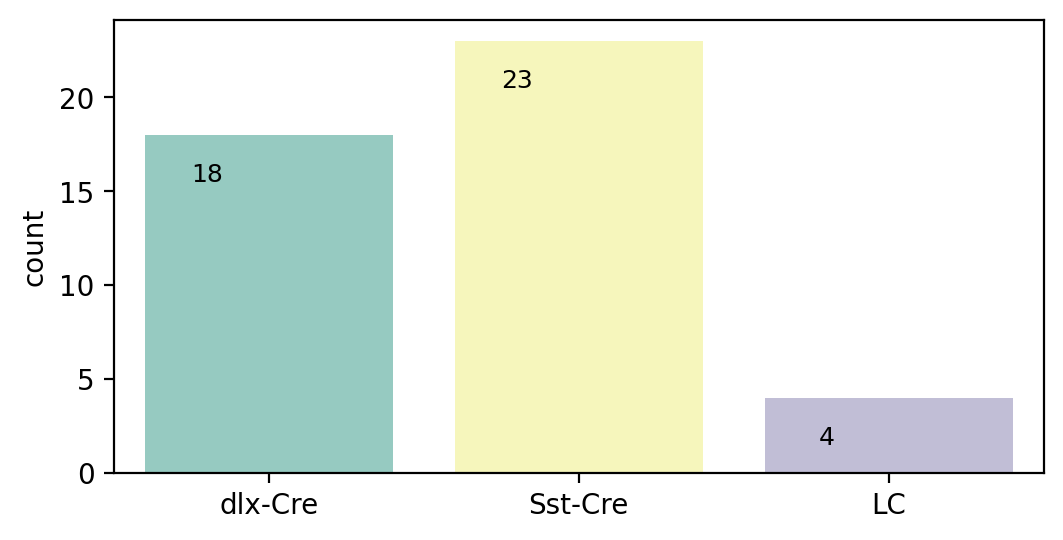

In [141]:
plt.figure(figsize=(6, 3), dpi=200)
ax = sns.countplot(y_pred_new, palette="Set3");
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=9)